# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3176.87,1.542143e+10,...,2.140758e+09,7.243448e+08,46620672.0,21.77,5.448172e+08,276758528.0,3255.28,1.542143e+10,Campylobacter jejuni,46411776.0
1,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,1006.71,5.378331e+09,...,3.763491e+09,3.763491e+09,134238208.0,30.84,8.196547e+08,459227136.0,1255.01,5.378331e+09,Escherichia coli,87617536.0
2,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2381.63,9.849967e+09,...,2.877428e+09,9.822577e+08,173309952.0,36.01,9.941811e+08,659406848.0,2538.70,9.849967e+09,Listeria monocytogenes,39071744.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1527.03,7.293293e+09,...,5.883326e+09,2.521530e+09,251686912.0,40.82,1.335919e+09,870039552.0,1865.14,7.293293e+09,Salmonella enterica,78376960.0
4,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3183.70,1.589219e+10,...,2.125062e+09,7.274988e+08,46510080.0,22.97,5.446164e+08,276623360.0,3260.48,1.589219e+10,Campylobacter jejuni,46301184.0
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,1006.53,5.406507e+09,...,3.767517e+09,3.767517e+09,134508544.0,31.12,8.192778e+08,459132928.0,1259.03,5.406507e+09,Escherichia coli,87998464.0
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2379.03,9.583411e+09,...,2.858324e+09,9.640018e+08,174436352.0,35.44,9.943163e+08,659709952.0,2533.80,9.583411e+09,Listeria monocytogenes,39927808.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,2,23,418622,165,4,4808805,1516.36,6.694564e+09,...,6.598312e+09,3.071734e+09,250753024.0,38.17,1.336205e+09,870522880.0,1884.68,6.694564e+09,Salmonella enterica,76316672.0
8,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3172.02,1.472430e+10,...,2.122781e+09,7.224975e+08,46473216.0,19.36,5.451489e+08,276709376.0,3244.64,1.472430e+10,Campylobacter jejuni,46264320.0
9,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,999.35,5.510656e+09,...,3.806822e+09,3.806822e+09,134520832.0,28.18,8.196547e+08,459460608.0,1257.11,5.510656e+09,Escherichia coli,88047616.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46620672.0,46411776.0
Escherichia coli,1,134238208.0,87617536.0
Listeria monocytogenes,1,173309952.0,39071744.0
Salmonella enterica,1,251686912.0,78376960.0
Campylobacter jejuni,2,46510080.0,46301184.0
Escherichia coli,2,134508544.0,87998464.0
Listeria monocytogenes,2,174436352.0,39927808.0
Salmonella enterica,2,250753024.0,76316672.0
Campylobacter jejuni,3,46473216.0,46264320.0


## 1.1. Add coverage information

In [3]:
read_stats_df = pd.read_csv('cases/full/reads-stats.tsv', sep='\t')

dataset_ref = index_info_df[index_info_df['Iteration'] == 1][['Name', 'Reference length']]

read_stats_df = read_stats_df.merge(dataset_ref, left_on='Dataset', right_on='Name')
read_stats_df['Coverage'] = read_stats_df['Number nucleotides'] / read_stats_df['Reference length']
read_stats_df = read_stats_df.groupby('Dataset').agg({'Coverage': ['mean', 'std']})
read_stats_df.columns = read_stats_df.columns.droplevel()
read_stats_df = read_stats_df.rename({'mean': 'Mean coverage/sample', 'std': 'Stddev coverage/sample'}, axis='columns')
read_stats_df = read_stats_df.reset_index()
read_stats_df

,Dataset,Mean coverage/sample,Stddev coverage/sample
0,0810PADBR-1,402.293924,146.821037
1,1203NYJAP-1 - Tuna Scrape Outbreak,57.930072,19.001234
2,1405WAEXK-1,65.893699,29.617546
3,1408MLGX6-3WGS,129.554157,61.682928


In [4]:
index_info_cov_df = index_info_df.merge(read_stats_df, left_on='Name', right_on='Dataset')
index_info_cov_df['Number features/sample (all)'] = index_info_cov_df['Number features (all)'] / \
                                                    index_info_cov_df['Number samples']
index_info_cov_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism),Dataset,Mean coverage/sample,Stddev coverage/sample,Number features/sample (all)
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3176.87,1.542143e+10,...,5.448172e+08,276758528.0,3255.28,1.542143e+10,Campylobacter jejuni,46411776.0,0810PADBR-1,402.293924,146.821037,2050.772727
1,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3183.70,1.589219e+10,...,5.446164e+08,276623360.0,3260.48,1.589219e+10,Campylobacter jejuni,46301184.0,0810PADBR-1,402.293924,146.821037,2050.772727
2,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3172.02,1.472430e+10,...,5.451489e+08,276709376.0,3244.64,1.472430e+10,Campylobacter jejuni,46264320.0,0810PADBR-1,402.293924,146.821037,2050.772727
3,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,1006.71,5.378331e+09,...,8.196547e+08,459227136.0,1255.01,5.378331e+09,Escherichia coli,87617536.0,1405WAEXK-1,65.893699,29.617546,61201.777778
4,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,1006.53,5.406507e+09,...,8.192778e+08,459132928.0,1259.03,5.406507e+09,Escherichia coli,87998464.0,1405WAEXK-1,65.893699,29.617546,61201.777778
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,999.35,5.510656e+09,...,8.196547e+08,459460608.0,1257.11,5.510656e+09,Escherichia coli,88047616.0,1405WAEXK-1,65.893699,29.617546,61201.777778
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2381.63,9.849967e+09,...,9.941811e+08,659406848.0,2538.70,9.849967e+09,Listeria monocytogenes,39071744.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
7,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2379.03,9.583411e+09,...,9.943163e+08,659709952.0,2533.80,9.583411e+09,Listeria monocytogenes,39927808.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
8,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,3,31,142442,170,4,2939733,2410.75,9.860563e+09,...,9.951232e+08,660127744.0,2563.83,9.860563e+09,Listeria monocytogenes,39075840.0,1408MLGX6-3WGS,129.554157,61.682928,4594.903226
9,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1527.03,7.293293e+09,...,1.335919e+09,870039552.0,1865.14,7.293293e+09,Salmonella enterica,78376960.0,1203NYJAP-1 - Tuna Scrape Outbreak,57.930072,19.001234,18200.956522


## 1.2. Organism info

In [5]:
organism_info_df = index_info_cov_df.groupby('Organism').agg({'Number features (all)': 'first',
                                                              'Number features/sample (all)': 'first',
                                                              'Mean coverage/sample': 'first',
                                                              'Number samples': 'first',
                                                              'Reference length': 'first'})
organism_info_df

,Number features (all),Number features/sample (all),Mean coverage/sample,Number samples,Reference length
Organism,,,,,
Campylobacter jejuni,45117,2050.772727,402.293924,22,1634890
Escherichia coli,550816,61201.777778,65.893699,9,5412686
Listeria monocytogenes,142442,4594.903226,129.554157,31,2939733
Salmonella enterica,418622,18200.956522,57.930072,23,4808805


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [6]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [164]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_cov_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length',
                                                              'Mean coverage/sample',
                                                              'Number features (all)',
                                                              'Number features/sample (all)',
                                                              'Number features (no unknown)'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Mean coverage/sample,Number features (all),Number features/sample (all),Number features (no unknown),Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3176.87,52.947833,0.882464,144.403182,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3183.70,53.061667,0.884361,144.713636,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
2,0810PADBR-1,Campylobacter jejuni,22,1634890,402.293924,45117,2050.772727,1102,Analysis,3172.02,52.867000,0.881117,144.182727,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
3,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,1006.71,16.778500,0.279642,111.856667,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
4,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,1006.53,16.775500,0.279592,111.836667,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,65.893699,550816,61201.777778,601,Analysis,999.35,16.655833,0.277597,111.038889,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2381.63,39.693833,0.661564,76.826774,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2379.03,39.650500,0.660842,76.742903,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
8,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,129.554157,142442,4594.903226,170,Analysis,2410.75,40.179167,0.669653,77.766129,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
9,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,57.930072,418622,18200.956522,165,Analysis,1527.03,25.450500,0.424175,66.392609,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


In [207]:
index_info_runtime_mean_df = index_info_runtime_df[
    ['Name', 'Stage', 'Time/sample (seconds)', 'Number samples', 'Number features/sample (all)',
     'Reference length', 'Mean coverage/sample']].groupby(
    ['Name', 'Stage']).agg(['mean', 'std', 'count'])
index_info_runtime_mean_df.columns = list(map('_'.join, index_info_runtime_mean_df.columns.values))
index_info_runtime_mean_df = index_info_runtime_mean_df.rename({
    'Time/sample (seconds)_mean': 'time',
    'Number samples_mean': 'samples',
    'Number features/sample (all)_mean': 'features',
    'Reference length_mean': 'reference',
    'Mean coverage/sample_mean': 'coverage',
    }, axis='columns')
index_info_runtime_mean_df

time  \
Name                               Stage                  
0810PADBR-1                        Analysis  144.433182   
                                   Index       2.480455   
                                   Total     147.884848   
                                   Tree        0.971212   
1203NYJAP-1 - Tuna Scrape Outbreak Analysis   66.174783   
                                   Index      13.442464   
                                   Total      81.294348   
                                   Tree        1.677101   
1405WAEXK-1                        Analysis  111.577407   
                                   Index      24.756296   
                                   Total     139.672222   
                                   Tree        3.338519   
1408MLGX6-3WGS                     Analysis   77.111935   
                                   Index       3.862473   
                                   Total      82.111075   
                                   Tree        1.136667   

                                             Time/sample (seconds)_std  \
Name                               Stage                                 
0810PADBR-1                        Analysis                   0.266723   
                                   Index                      0.082438   
                                   Total                      0.367009   
                                   Tree                       0.083568   
1203NYJAP-1 - Tuna Scrape Outbreak Analysis                   0.233244   
                                   Index                      0.792057   
                                   Total                      0.574689   
                                   Tree                       0.090201   
1405WAEXK-1                        Analysis                   0.466478   
                                   Index                      0.687185   
                                   Total                      0.223408   
                                   Tree                       0.180292   
1408MLGX6-3WGS                     Analysis                   0.568098   
                                   Index                      0.037873   
                                   Total                      0.519700   
                                   Tree                       0.028792   

                                             Time/sample (seconds)_count  \
Name                               Stage                                   
0810PADBR-1                        Analysis                            3   
                                   Index                               3   
                                   Total                               3   
                                   Tree                                3   
1203NYJAP-1 - Tuna Scrape Outbreak Analysis                            3   
                                   Index                               3   
                                   Total                               3   
                                   Tree                                3   
1405WAEXK-1                        Analysis                            3   
                                   Index                               3   
                                   Total                               3   
                                   Tree                                3   
1408MLGX6-3WGS                     Analysis                            3   
                                   Index                               3   
                                   Total                               3   
                                   Tree                                3   

                                             samples  Number samples_std  \
Name                               Stage                                   
0810PADBR-1                        Analysis     22.0                 0.0   
                                   Index        22.0      

In [208]:
idx = pd.IndexSlice
df = index_info_runtime_mean_df.loc[idx[:, 'Analysis'], :]
df.index = df.index.droplevel('Stage')
df

,time,Time/sample (seconds)_std,Time/sample (seconds)_count,samples,Number samples_std,Number samples_count,features,Number features/sample (all)_std,Number features/sample (all)_count,reference,Reference length_std,Reference length_count,coverage,Mean coverage/sample_std,Mean coverage/sample_count
Name,,,,,,,,,,,,,,,
0810PADBR-1,144.433182,0.266723,3,22.0,0.0,3,2050.772727,0.0,3,1634890.0,0.0,3,402.293924,0.0,3
1203NYJAP-1 - Tuna Scrape Outbreak,66.174783,0.233244,3,23.0,0.0,3,18200.956522,0.0,3,4808805.0,0.0,3,57.930072,0.0,3
1405WAEXK-1,111.577407,0.466478,3,9.0,0.0,3,61201.777778,0.0,3,5412686.0,0.0,3,65.893699,0.0,3
1408MLGX6-3WGS,77.111935,0.568098,3,31.0,0.0,3,4594.903226,0.0,3,2939733.0,0.0,3,129.554157,0.0,3


In [209]:
import statsmodels.formula.api as smf

results = smf.ols('time ~ samples', data=df).fit()
results.summary()

/home/CSCScience.ca/apetkau/miniconda3/envs/gdi-reads/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                 -0.256
Method:                 Least Squares   F-statistic:                    0.3884
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.597
Time:                        15:58:02   Log-Likelihood:                -19.021
No. Observations:                   4   AIC:                             42.04
Df Residuals:                       2   BIC:                             40.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.2136     57.144      2.331      0.145    -112.655     379.082
samples       -1.5713      2.521     -0.623      0.597     -12.419       9.276
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.033
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.491
Skew:                           0.739   Prob(JB):                        0.782
Kurtosis:                       2.125   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
?results.params

Type:        Series
String form:
Intercept    652.247387
samples       64.532084
dtype: float64
Length:      2
File:        ~/miniconda3/envs/gdi-reads/lib/python3.8/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    Value

In [169]:
results.params['samples']

64.5320837520938

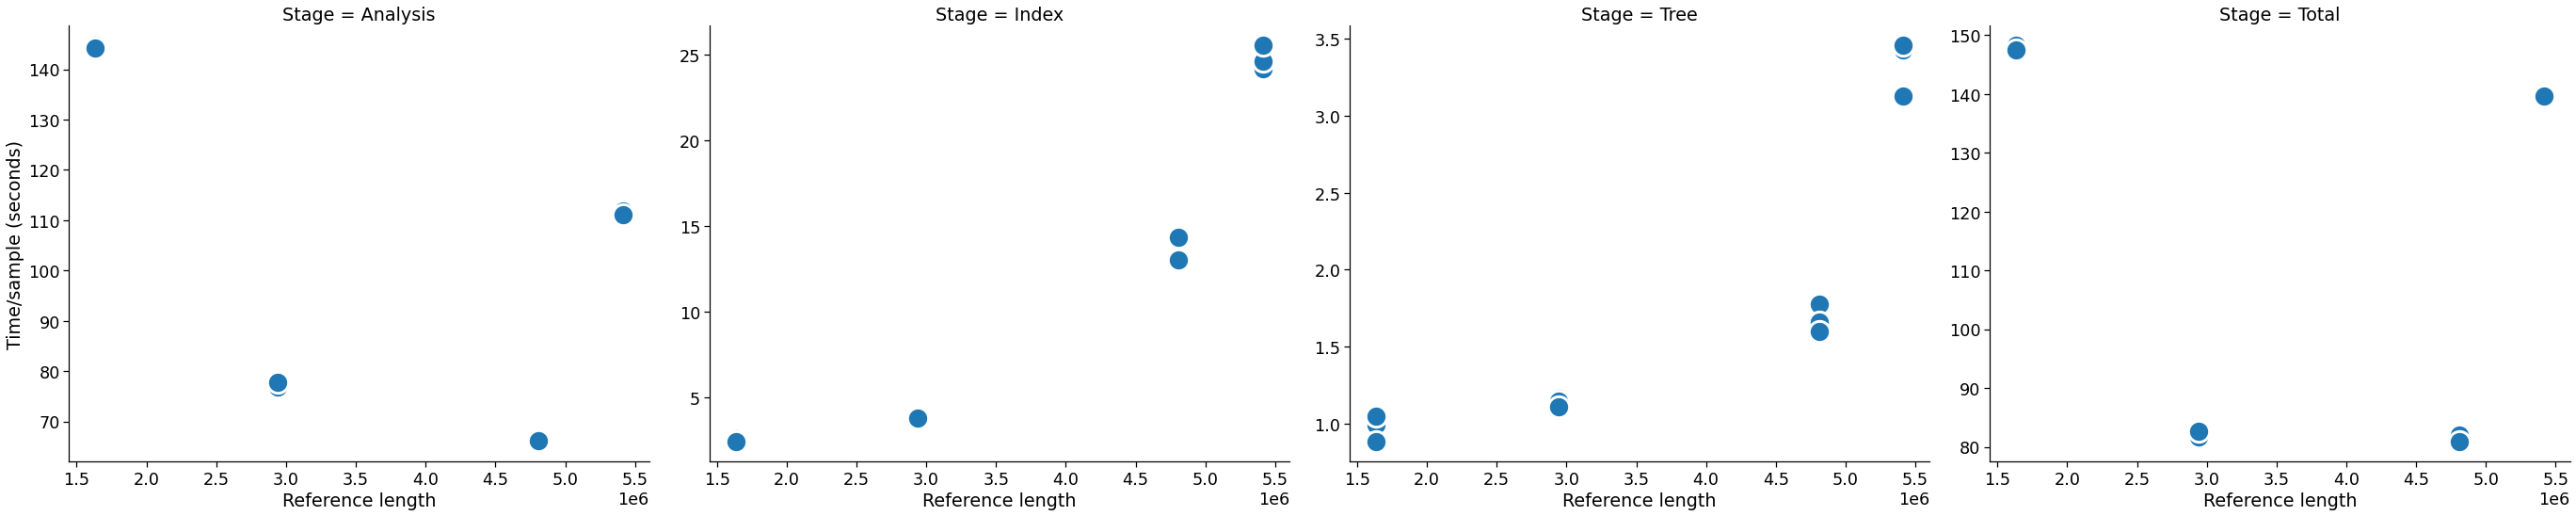

In [200]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Reference length', y='Time/sample (seconds)',
                    col="Stage",
                    kind="scatter",
                    data=index_info_runtime_df,
                    height=8, aspect=1.2,
                    linewidth=3,
                    s=500,
                    palette=stages_palette,
                    markers=stages_markers,
                    facet_kws={'sharey': False, 'sharex': True},
                    )
    
#     for ax in g.axes.flat:
#         idx = 0        
#         for name, values in organism_info_df.iterrows():
#             value = values.loc['Number samples']
#             ax.axvline(value, color='gray', ls='--')
#             ylim = ax.get_ylim()
#             ylen = ylim[1] - ylim[0]
#             if name == 'Campylobacter jejuni':
#                 ypos = ylim[1] + 3
#                 xpos = value - 1
#             elif name == 'Salmonella enterica':
#                 ypos = ylim[1] - ylen * 0.1
#                 xpos = value + value * 0.02
#             else:
#                 ypos = ylim[1] - ylen * 0.04
#                 xpos = value + value * 0.02
#             ax.text(xpos, ypos, f'{name}\n({value:0.0f})', fontdict={'size': 14, 'color': 'gray'})
            
#             idx += 1

    # plt.savefig('figures/index-runtime.pdf')

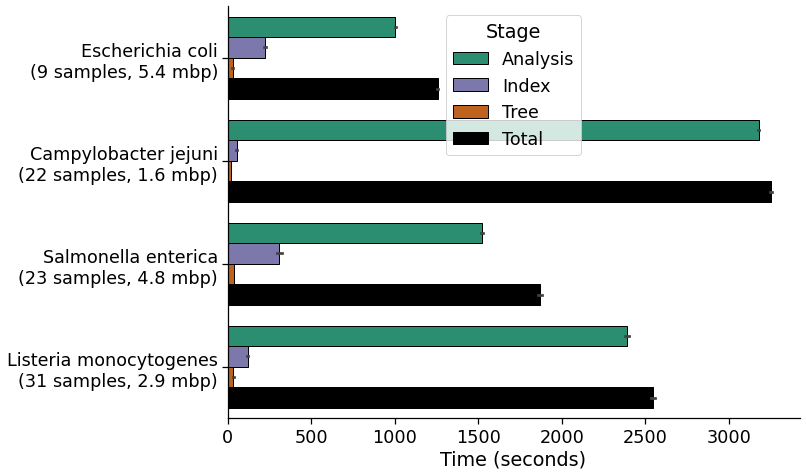

In [106]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Time (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

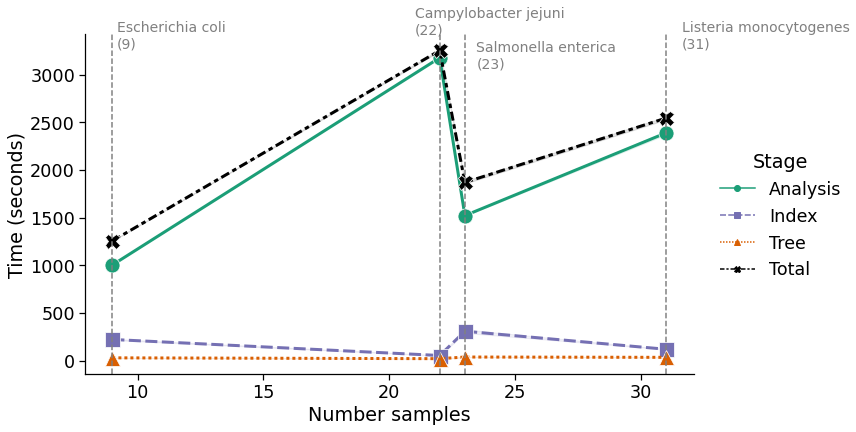

In [107]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Number samples', y='Time (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Number samples']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - 1
            elif name == 'Salmonella enterica':
                ypos = ylim[1] - ylen * 0.1
                xpos = value + value * 0.02
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f})', fontdict={'size': 14, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

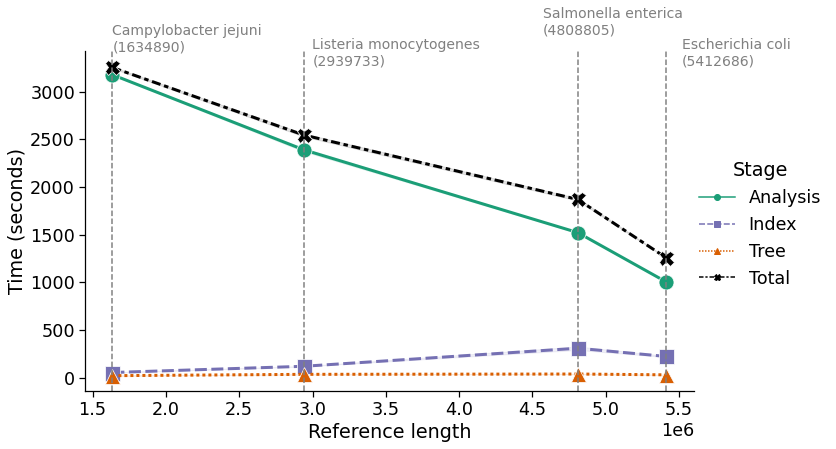

In [108]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Reference length', y='Time (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Reference length']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - 1
            elif name == 'Salmonella enterica':
                ypos = ylim[1] + ylen * 0.05
                xpos = value - value * 0.05
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f})', fontdict={'size': 14, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

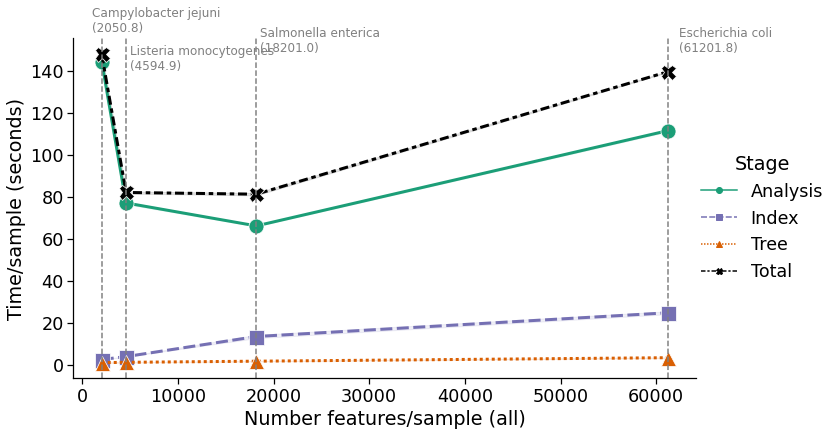

In [48]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Number features/sample (all)', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        idx = 0        
        for name, values in organism_info_df.iterrows():
            value = values.loc['Number features/sample (all)']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Campylobacter jejuni':
                ypos = ylim[1] + 3
                xpos = value - value * 0.5
            elif name == 'Listeria monocytogenes':
                ypos = ylim[1] - 15
                xpos = value + value * 0.1
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.1f})', fontdict={'size': 12, 'color': 'gray'})
            
            idx += 1

    # plt.savefig('figures/index-runtime.pdf')

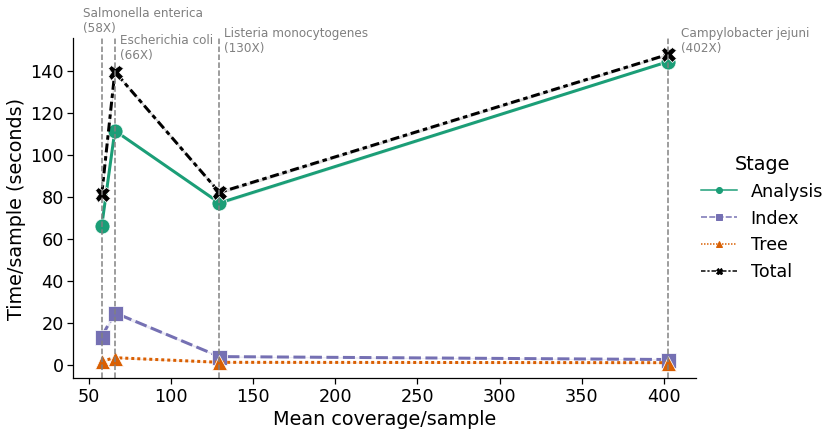

In [49]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Mean coverage/sample', y='Time/sample (seconds)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=6, aspect=1.7,
                    linewidth=3, markersize=15, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)
    
    for ax in g.axes.flat:
        for name, values in organism_info_df.iterrows():
            value = values.loc['Mean coverage/sample']
            ax.axvline(value, color='gray', ls='--')
            ylim = ax.get_ylim()
            ylen = ylim[1] - ylim[0]
            if name == 'Salmonella enterica':
                ypos = ylim[1] + 3
                xpos = value - value * 0.2
            elif name == 'Escherichia coli':
                ypos = ylim[1] - 10
                xpos = value + value * 0.05
            else:
                ypos = ylim[1] - ylen * 0.04
                xpos = value + value * 0.02
            ax.text(xpos, ypos, f'{name}\n({value:0.0f}X)', fontdict={'size': 12, 'color': 'gray'})

    # plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [ ]:
index_info_runtime_df[['Label', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

## 2.2. Memory plots

In [ ]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (GB)'] = df['Peak Memory (GB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
             df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_cov_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

In [ ]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Peak Memory (GB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [ ]:
index_info_memory_df[['Label', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

## 2.3. Disk usage plots

In [ ]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_cov_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

In [ ]:
with sns.plotting_context("notebook", font_scale=1.8):
    cat_order = index_info_disk_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [ ]:
index_info_disk_df[['Label', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])